# Importing libraries and data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Loan Eligibility Prediction.csv")

In [3]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [4]:
df.info

<bound method DataFrame.info of      Customer_ID  Gender Married  Dependents     Education Self_Employed  \
0            569  Female      No           0      Graduate            No   
1             15    Male     Yes           2      Graduate            No   
2             95    Male      No           0  Not Graduate            No   
3            134    Male     Yes           0      Graduate           Yes   
4            556    Male     Yes           1      Graduate            No   
..           ...     ...     ...         ...           ...           ...   
609          480    Male     Yes           2      Graduate            No   
610          525    Male      No           0      Graduate            No   
611          551    Male     Yes           2      Graduate           Yes   
612          552    Male     Yes           1  Not Graduate            No   
613          606    Male     Yes           0  Not Graduate            No   

     Applicant_Income  Coapplicant_Income  Loan_Amount 

In [5]:
df.isnull()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.shape

(614, 13)

# using heatmap to check the correlation

In [8]:
df.corr()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Customer_ID,1.000000,0.044770,0.016925,0.039211,0.041906,0.009635,-0.032593
Dependents,0.044770,1.000000,0.133364,0.036092,0.159684,-0.077266,-0.053249
Applicant_Income,0.016925,0.133364,1.000000,-0.116605,0.546275,-0.028039,-0.014902
Coapplicant_Income,0.039211,0.036092,-0.116605,1.000000,0.191035,-0.048870,0.009719
Loan_Amount,0.041906,0.159684,0.546275,0.191035,1.000000,0.058471,0.007295
Loan_Amount_Term,0.009635,-0.077266,-0.028039,-0.048870,0.058471,1.000000,0.056737
Credit_History,-0.032593,-0.053249,-0.014902,0.009719,0.007295,0.056737,1.000000


<AxesSubplot:>

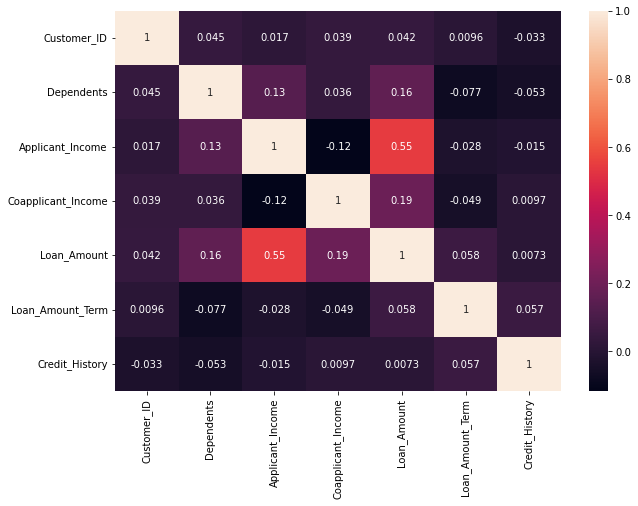

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

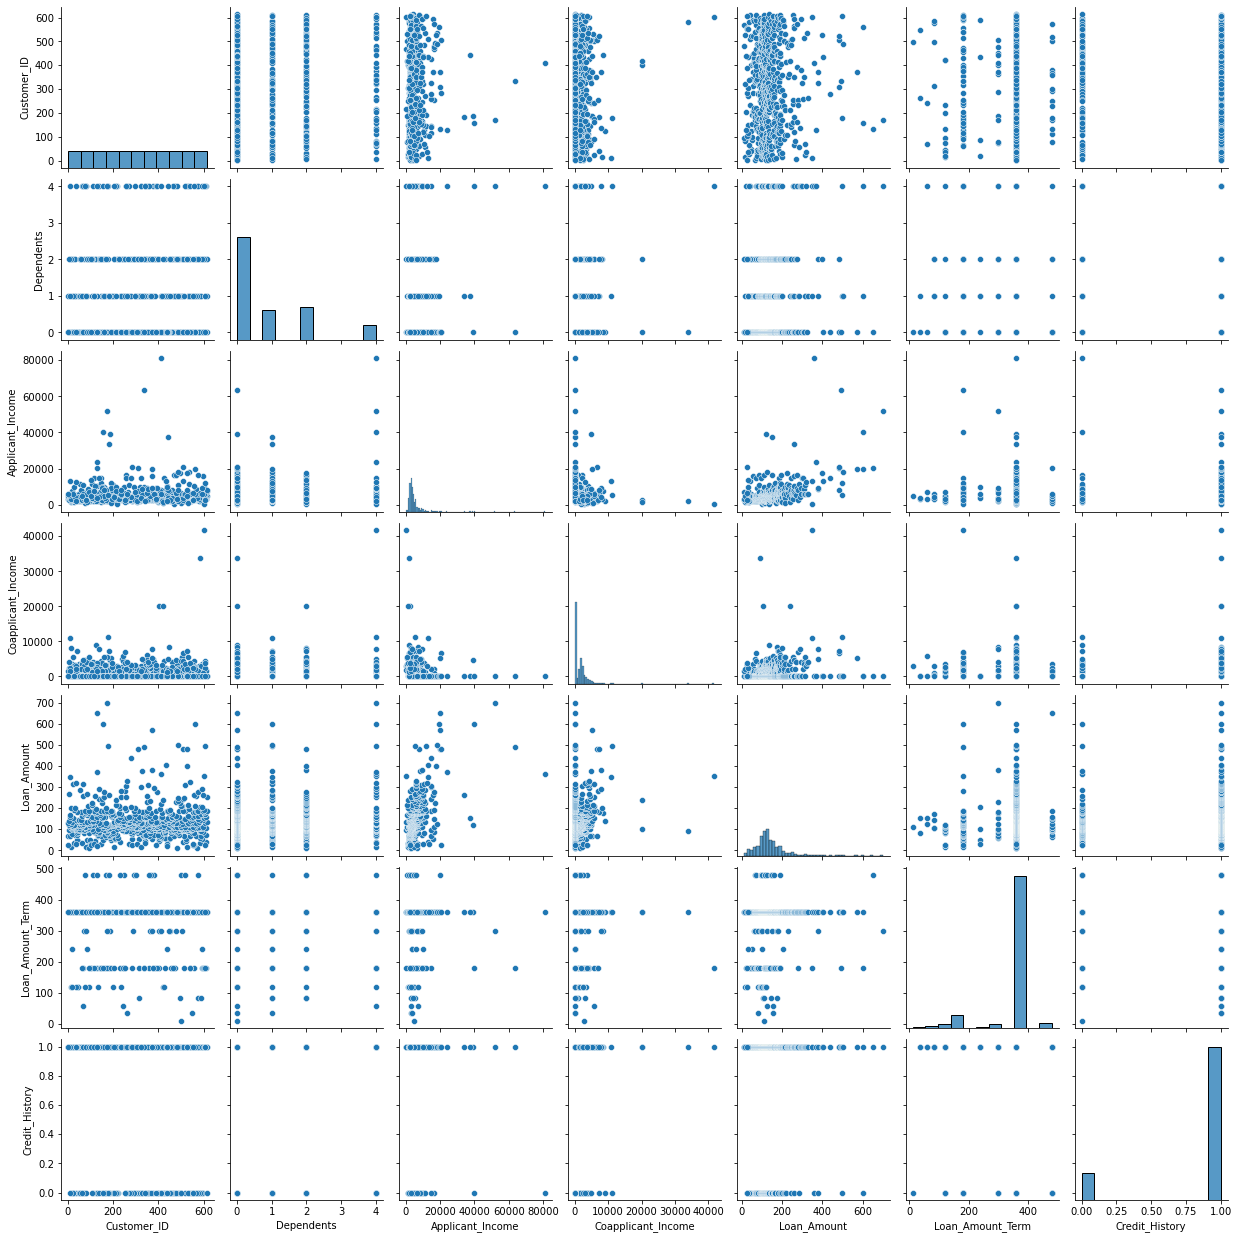

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [14]:
df["Gender"]=lb.fit_transform(df["Gender"])
df["Married"]=lb.fit_transform(df["Married"])
df["Education"]=lb.fit_transform(df["Education"])
df["Self_Employed"]=lb.fit_transform(df["Self_Employed"])
df["Property_Area"]=lb.fit_transform(df["Property_Area"])
df["Loan_Status"]=lb.fit_transform(df["Loan_Status"])

In [15]:
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


# Training and spliting the data

In [16]:
x=df.drop(["Customer_ID","Loan_Status"],axis=1)
y=df["Loan_Status"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
351,1,1,0,0,0,3087,2210.0,136,360,0,1
593,1,1,0,0,0,2275,2067.0,30,360,1,2
320,1,1,0,0,0,3727,1775.0,131,360,1,1
186,1,1,1,0,1,1000,3022.0,110,360,1,2
557,0,0,0,0,0,8333,0.0,280,360,1,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [23]:
xtrain

array([[ 0.50072833,  0.75592895, -0.67426665, ...,  0.29214583,
        -2.38812165, -0.05356289],
       [ 0.50072833,  0.75592895, -0.67426665, ...,  0.29214583,
         0.41873914,  1.2230193 ],
       [ 0.50072833,  0.75592895, -0.67426665, ...,  0.29214583,
         0.41873914, -0.05356289],
       ...,
       [ 0.50072833,  0.75592895, -0.67426665, ...,  0.29214583,
         0.41873914, -1.33014508],
       [ 0.50072833,  0.75592895,  1.0475214 , ...,  0.29214583,
         0.41873914, -1.33014508],
       [ 0.50072833,  0.75592895,  2.76930945, ...,  0.29214583,
         0.41873914, -0.05356289]])

# Import model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model=DecisionTreeClassifier(max_depth=5,random_state=0)

In [26]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [27]:
ypred=model.predict(xtest)

In [28]:
ypred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0])

# Probability of predicted datas

In [29]:
model.predict_proba(xtest)

array([[0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [0.26470588, 0.73529412],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.04395604, 0.95604396],
       [0.04395604, 0.95604396],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [0.26470588, 0.73529412],
       [0.04395604, 0.95604396],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.24      , 0.76      ],
       [0.

# Model Evaluation

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
confusion_matrix(ytest,ypred)

array([[ 22,  32],
       [  8, 123]], dtype=int64)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.41      0.52        54
           1       0.79      0.94      0.86       131

    accuracy                           0.78       185
   macro avg       0.76      0.67      0.69       185
weighted avg       0.78      0.78      0.76       185



# Decision tree plot

In [33]:
from sklearn.tree import plot_tree

[Text(816.075, 1494.8999999999999, 'X[9] <= -0.985\ngini = 0.436\nsamples = 429\nvalue = [138, 291]'),
 Text(502.20000000000005, 1223.1, 'X[7] <= 4.451\ngini = 0.117\nsamples = 64\nvalue = [60, 4]'),
 Text(418.5, 951.3, 'X[6] <= 2.318\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(251.10000000000002, 679.4999999999999, 'X[0] <= -0.748\ngini = 0.063\nsamples = 61\nvalue = [59, 2]'),
 Text(167.4, 407.6999999999998, 'X[7] <= -0.389\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(83.7, 135.89999999999986, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(251.10000000000002, 135.89999999999986, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(334.8, 407.6999999999998, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(585.9, 679.4999999999999, 'X[1] <= -0.283\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(502.20000000000005, 407.6999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(669.6, 407.6999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(585

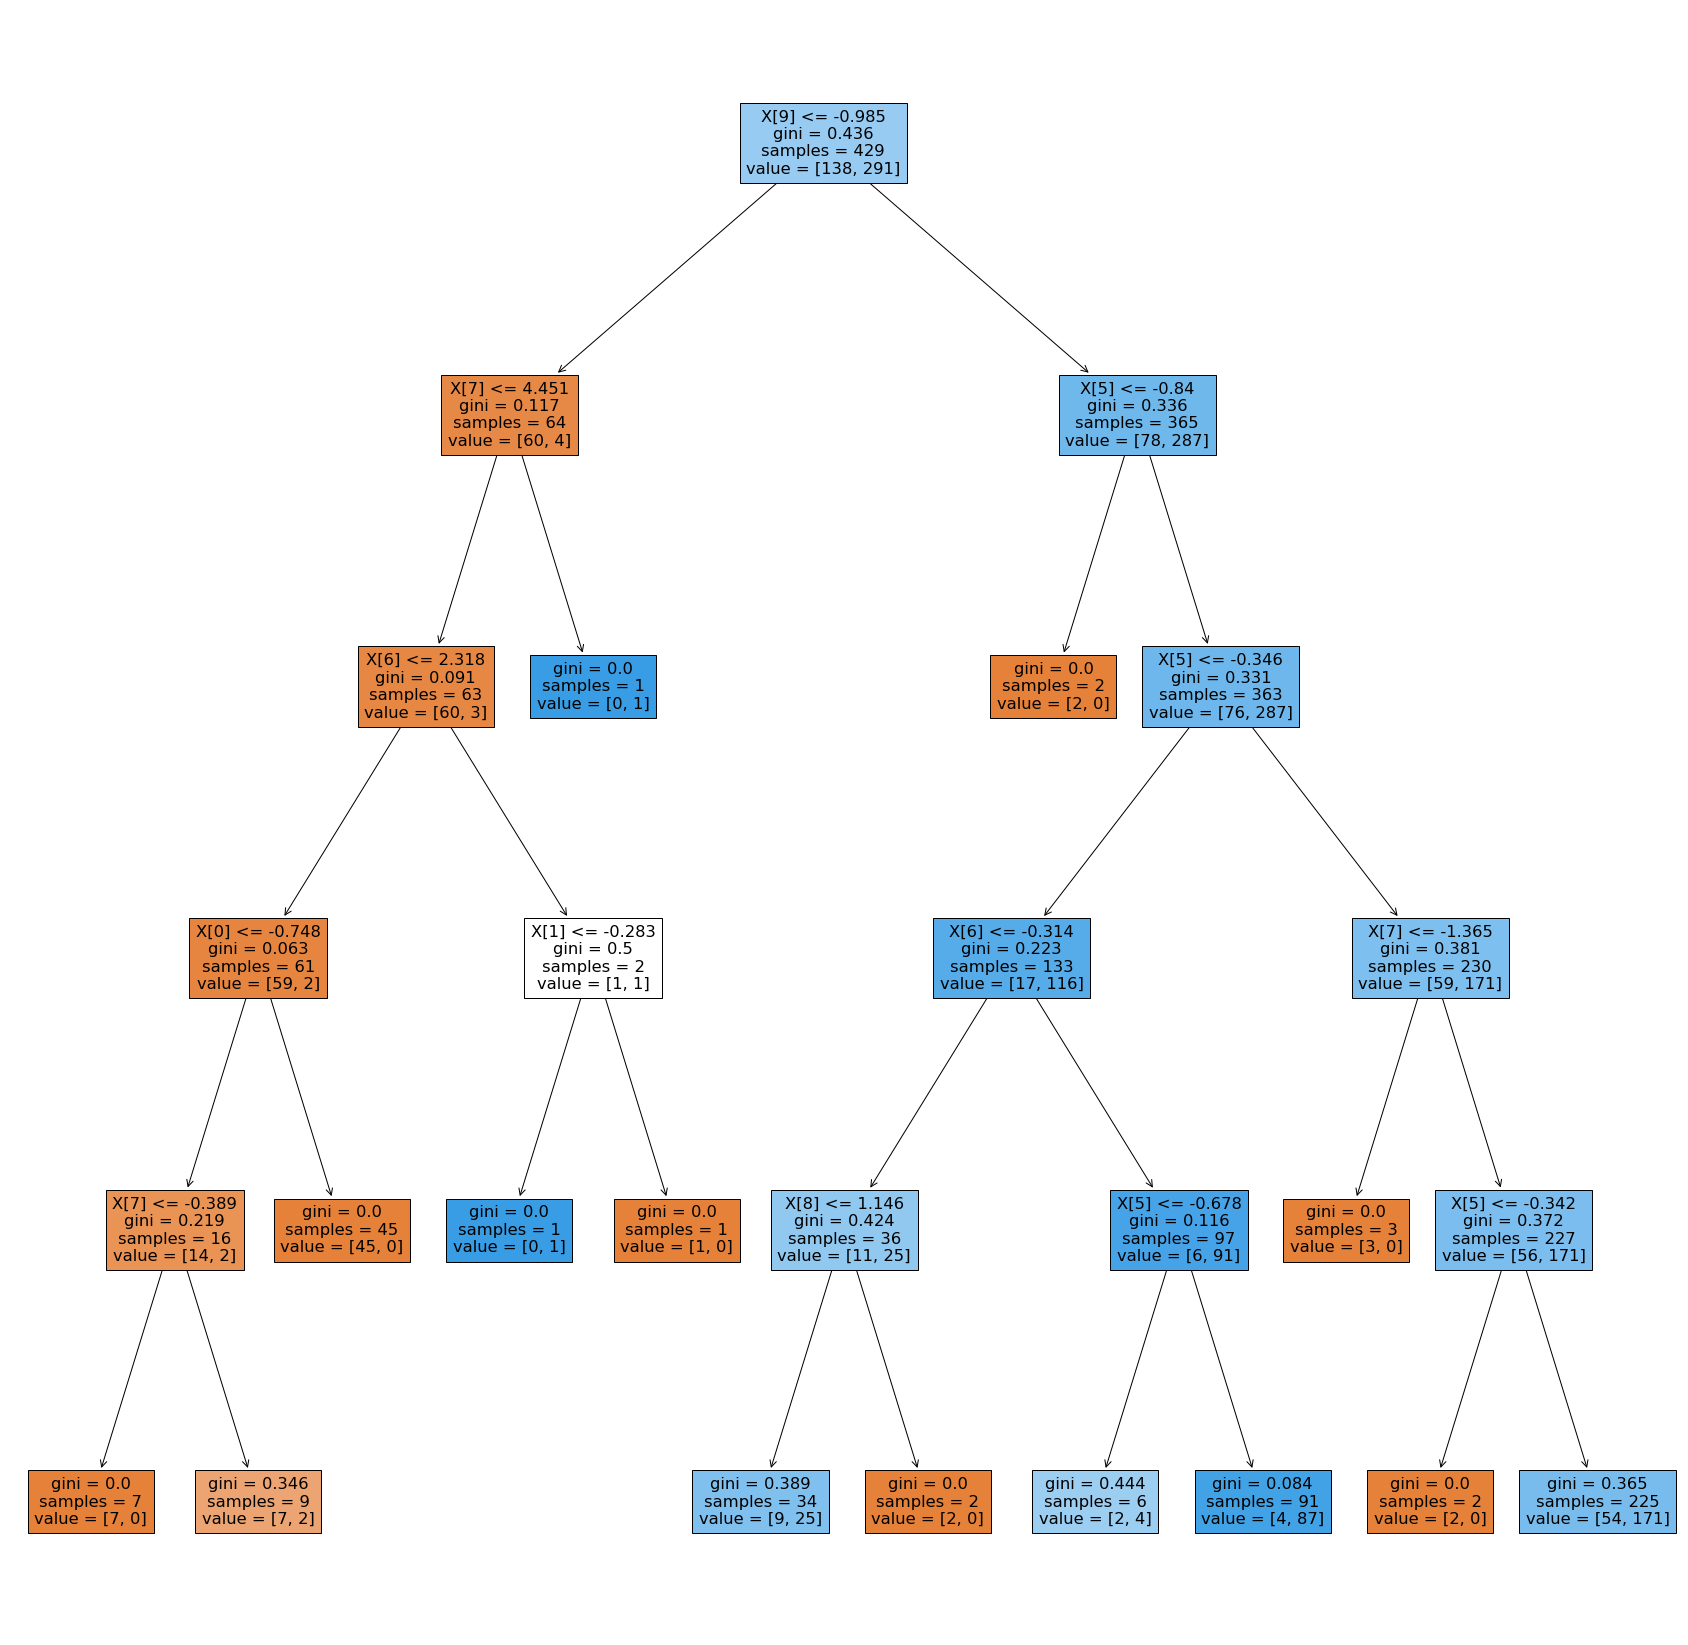

In [34]:
plt.figure(figsize=(30,30))
plot_tree(model,filled=True)